In [1]:
import torch
import torch.nn as nn

In [ ]:
# pip3 install torch

In [29]:
n_input, n_hidden,n_out,batch_size,learning_rate = 10,15,1,100,0.01

In [30]:
data_x = torch.randn(batch_size,n_input)

In [31]:
data_x

tensor([[ 1.6457e+00, -1.4377e-01, -3.8464e-01, -9.8637e-01,  1.4816e-01,
          5.2408e-01,  1.3092e+00, -4.9817e-01, -2.0828e-01, -6.1353e-01],
        [-3.0905e-01, -2.0185e-01,  1.5633e+00,  1.9083e+00, -7.2889e-01,
          1.8268e+00, -3.2365e-01,  2.3033e-02, -3.3199e-01,  4.0371e-01],
        [-9.9205e-01, -2.3501e-01, -1.5404e-01,  2.0508e+00,  4.9766e-01,
         -3.5100e-01,  9.4129e-01, -1.5195e+00, -8.4356e-01, -1.0920e+00],
        [-5.0293e-01,  9.8000e-01, -1.1386e+00,  8.8287e-01,  7.3094e-01,
         -1.9446e-01, -2.4925e-01,  3.3920e-01, -7.1155e-01, -1.3558e+00],
        [ 2.5888e+00,  9.2260e-02,  2.6684e-02, -4.0339e-01,  6.9440e-01,
          2.3792e-01,  1.6511e-02, -4.8322e-01,  1.4915e+00,  8.3700e-02],
        [-3.0145e-01, -1.5254e+00,  4.6287e-01,  1.8112e+00,  3.2110e-02,
         -1.2476e+00, -4.6659e-01,  9.4128e-01,  2.3515e-01,  2.3368e-01],
        [ 6.8965e-01, -4.7237e-01,  9.5477e-03, -3.5255e-01,  1.2594e+00,
         -4.2793e-01, -7.9065e-0

In [32]:
data_y = (torch.rand(size = (batch_size,1))<0.5).float()

In [33]:
data_y

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [34]:
print(data_x.size())

torch.Size([100, 10])


In [35]:
print(data_y.size())

torch.Size([100, 1])


In [36]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden,n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


In [37]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [38]:
losses = []
for epoch in range(50000):
    pred_y = model(data_x)
    loss = loss_function(pred_y,data_y)
    losses.append(loss.item())
    
    model.zero_grad()
    loss.backward()
    
    optimizer.step()

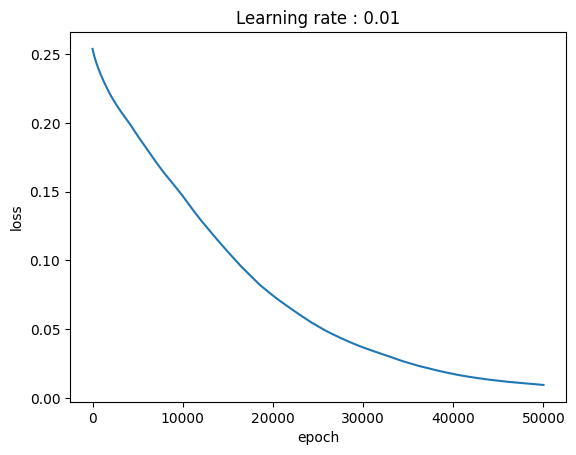

In [39]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Learning rate : 0.01')
plt.show()